In [7]:
import imageio
import time
import shutil

import ipywidgets as widgets

%widescreen

In [8]:
%time
save_folders = [
    '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/app_annotated_licks',
    '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/app_annotated_paws',
    '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/app_annotated_noncontacts',
    '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/app_annotated_ambiguous',
]
n_files = 0
for folder in save_folders:
    n_files += len(os.listdir(folder))
print(n_files)

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 14.1 µs
1046


In [9]:
list_of_dicts = []
for folder in save_folders:
    for filename in os.listdir(folder):
        _d = {
            'filename':filename,
            'foldername':os.path.split(folder)[1]
        }
        list_of_dicts.append(_d)
df = pd.DataFrame(list_of_dicts)

In [10]:
df_duplicated = df[df.duplicated('filename',keep=False)].sort_values(by='filename')
df_duplicated

,filename,foldername


In [27]:
def show_filename(filename,fig,ax):
    
    im = imageio.imread(path)
    ax.imshow(im)
    print('done with image')
    return None

done with image


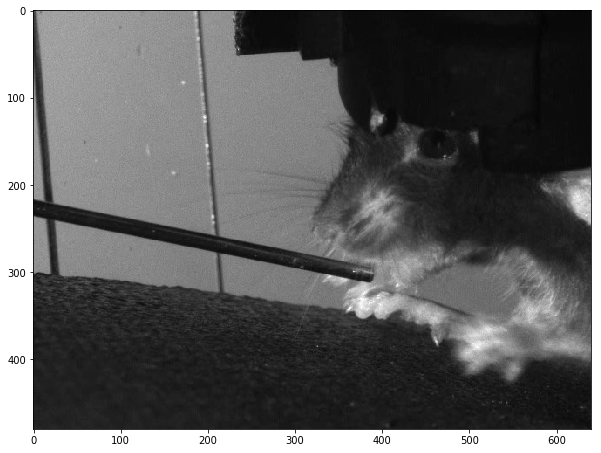

In [28]:
fig,ax=plt.subplots(figsize=(10,10))
filename = 'oeid_896160394__frame_121407.png'
show_filename(filename,fig,ax)

In [38]:
for filename in df_duplicated['filename'].unique():
    foldernames = df.query('filename == @filename').foldername
    for foldername in foldernames:
        if foldername is not 'app_annotated_ambiguous':
            src = os.path.join('/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation',foldername,filename)
            dst = os.path.join('/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation','app_annotated_ambiguous',filename)
            shutil.move(src,dst)
    